In [1]:
import os
from extract_archive import extract_zip, aggregate_dataframe
archive_name = 'grvingt-7-grvingt-8_2018-07-10_1607574.zip'
df = extract_zip(archive_name)['exp/exp_Recv.csv']
df.head()

,op,msg_size,start,duration,experiment,type,deployment,index
0,MPI_Recv,765921,0.002189,0.000084,grvingt-7-grvingt-8,exp/exp_Recv.csv,False,0
1,MPI_Recv,765921,0.003133,0.000074,grvingt-7-grvingt-8,exp/exp_Recv.csv,False,1
2,MPI_Recv,765921,0.004059,0.000073,grvingt-7-grvingt-8,exp/exp_Recv.csv,False,2
3,MPI_Recv,765921,0.004984,0.000073,grvingt-7-grvingt-8,exp/exp_Recv.csv,False,3
4,MPI_Recv,765921,0.005909,0.000074,grvingt-7-grvingt-8,exp/exp_Recv.csv,False,4


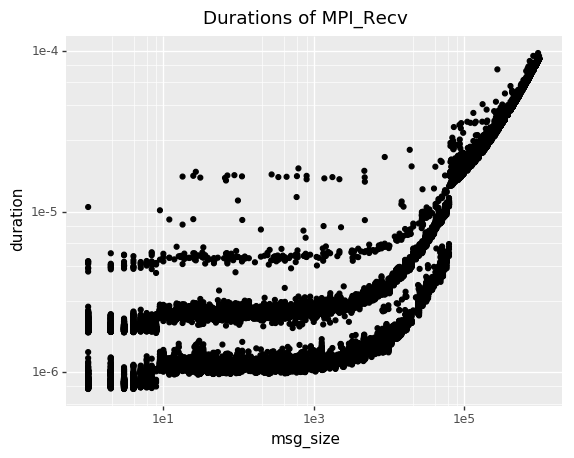

<ggplot: (8765222377273)>

In [2]:
%matplotlib inline
from plotnine import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # removing annoying Pandas warning

ggplot(df, aes(x='msg_size', y='duration')) + geom_point() + scale_x_log10() + scale_y_log10() + ggtitle('Durations of MPI_Recv')

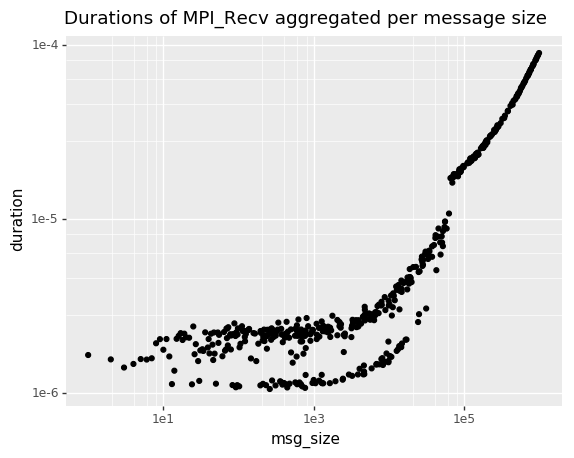

<ggplot: (-9223363271650263159)>

In [3]:
ggplot(aggregate_dataframe(df), aes(x='msg_size', y='duration')) + geom_point() + scale_x_log10() + scale_y_log10() + ggtitle('Durations of MPI_Recv aggregated per message size')

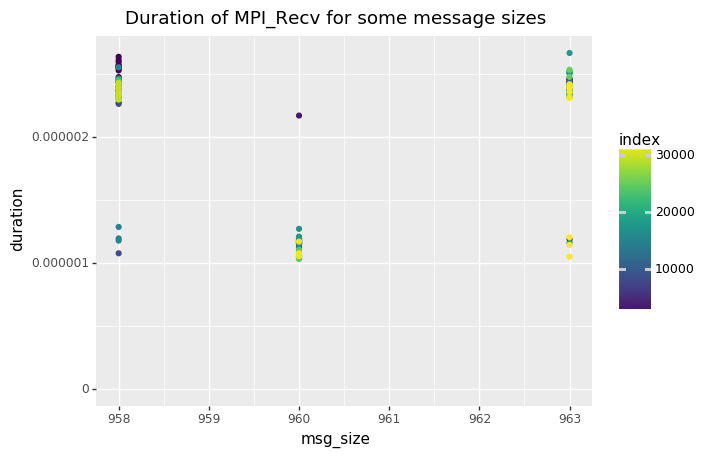

<ggplot: (8765204525141)>

In [4]:
tmp = df[(df.msg_size >= 950) & (df.msg_size < 970)]

ggplot(tmp, aes(x='msg_size', y='duration', color='index')) + geom_point() + expand_limits(y=0) + ggtitle('Duration of MPI_Recv for some message sizes')

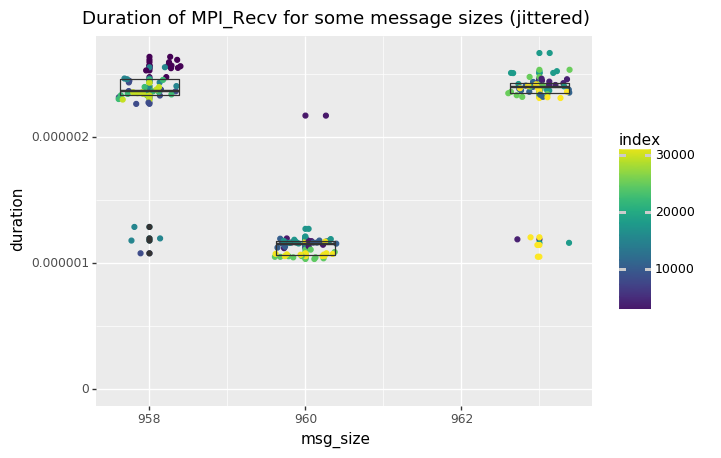

<ggplot: (-9223363271650263166)>

In [5]:
ggplot(tmp, aes(x='msg_size', y='duration', color='index')) + geom_point() + geom_jitter() + expand_limits(y=0) +\
    ggtitle('Duration of MPI_Recv for some message sizes (jittered)') +\
    geom_boxplot(group='msg_size', alpha=0)

In [6]:
import pandas
pandas.set_option('display.float_format', lambda x: '%.2e' % x)
tmp[['msg_size', 'duration']].groupby('msg_size').describe()

duration                                                        \
            count     mean      std      min      25%      50%      75%   
msg_size                                                                  
958      5.00e+01 2.31e-06 3.50e-07 1.08e-06 2.33e-06 2.36e-06 2.45e-06   
960      5.00e+01 1.15e-06 1.58e-07 1.03e-06 1.07e-06 1.15e-06 1.17e-06   
963      5.00e+01 2.28e-06 3.88e-07 1.05e-06 2.35e-06 2.40e-06 2.42e-06   

                   
              max  
msg_size           
958      2.63e-06  
960      2.17e-06  
963      2.66e-06